# STAT 201 Final Project
## Cardiovascular Disease Dataset
### Matt Lashner
___

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [53]:
# Read in CSV file
cardio = pd.read_csv("cardio_train.csv", delimiter=";")

In [54]:
#Drop unwanted rows
cardio.drop(["alco", "ap_hi", "ap_lo", "gluc", "cholesterol", "smoke"], axis=1, inplace=True)

In [55]:
# Take a look at the shape of the data (rows and columns)
cardio.shape

(70000, 7)

In [56]:
# Take a look at the first 5 lines of data
cardio.head()

,id,age,gender,height,weight,active,cardio
0,0,18393,2,168,62.0,1,0
1,1,20228,1,156,85.0,1,1
2,2,18857,1,165,64.0,0,1
3,3,17623,2,169,82.0,1,1
4,4,17474,1,156,56.0,0,0


This dataset is composed of 70,000 rows and 7 variables. Each row represents one patient who participated in a medical study. The data records information about each patient, such as their age, gender, etc. The data also notes whether each patient has, or does not have, a cardiac disease, represented by 1 (disease present) or 0 (no disease present). I am interested in this dataset because I am an EMT and I love cardiology. I didn't want to get too fancy, so I decided to focus on a patient's body makeup and lifestyle. Understanding factors that affect cardiovascular health can help further medical innovation and research. Based on the fact that I will be primarily correlating cardiac disease with one factor, I do not expect too much correlation, as I believe that it is generally an aggregation of factors. I got this dataset from kaggle [here](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/version/1?almost-there=true&token=CfDJ8LdUzqlsSWBPr4Ce3rb9VL9Ia1Xb1b48pFhvx1Ee1Br3n0AWqZkcRtJTY_tP9uqt97qRfWKegY6fCRGnCzd4JUHVPrxTXR-PNDKrZt4pmy-N1y8RFv5pfaeAQF3KyG-XTz0nx64om_mEbHPQHvk9-8Zguoa7cyUGo9hGR4C9CC5vXipxGg7Q8a7XZnEs3EayD3zUrRqYRlxcSKnArduq-Kw5u3N8scD1t2Eox-f80KygHSytqhze2tSDkAaKfsoFyB0ldWJgWqZlyWcsAv7DuHV659eVbuqX09NdSd3RSwNo7_D-nfPS3UQWB9JekzWf2G6DT7ohm5CyD06dZeFtmu4M0fl3VShlDLk2EW8MuN6S9Xece3hEHpKF9XhlkxvCJk6JRPjMtjJACABpb7GPRPxsbxma_BYhQen4U0ZXlbaGQWz6LBN0mjqGaBQDl2CFewZBBg4l4nhwin2VMW-jtIOAZH-gbg6b56GBVSUO18-fB1LHGzs-SPU302VCC7ExQOlGWwZm537KNKLjdIFWYjps90EGtYiAND8-hD9kfoFftizGiFYD1WAG49dgdBYiq13yzjEKGwiSsN_Ph43L3Us).  

In [57]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 7 columns):
id        70000 non-null int64
age       70000 non-null int64
gender    70000 non-null int64
height    70000 non-null int64
weight    70000 non-null float64
active    70000 non-null int64
cardio    70000 non-null int64
dtypes: float64(1), int64(6)
memory usage: 3.7 MB


The nominal variables is: gender (1 = female, 2 = male). active (0 = is not active, 1 = is active), and cardio (0 = no disease present, 1 = disease present) are also nominal binary variables

There are no ordinal, nor interval values.

The ratio variables are: age (in days) height (in cm) and weight (in kg).

### Age

In [58]:
# Distribution of age
cardio.age.value_counts()

19741    32
18236    32
20376    31
20442    31
18253    31
20457    30
21159    30
21892    30
20464    30
18184    30
20389    29
21867    29
20359    29
20401    29
21927    29
19733    29
19657    29
20370    28
21142    28
19709    28
21225    28
19711    28
20347    28
19770    28
18189    28
19721    28
20490    28
21147    28
21191    27
21117    27
         ..
16956     1
17943     1
15768     1
15027     1
14795     1
15732     1
20934     1
23659     1
22200     1
21611     1
23658     1
23594     1
18554     1
16204     1
18682     1
16268     1
16332     1
16452     1
14900     1
17019     1
20779     1
18565     1
16359     1
16323     1
16167     1
17768     1
21497     1
15591     1
23672     1
14329     1
Name: age, Length: 8076, dtype: int64

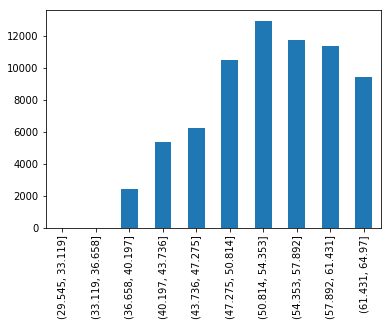

In [59]:
# Create a new variable to convert age to years (2 decimal places) 
ageyear = round(cardio.age/365,2)

# Create 10 bins of equal width, and print column chart 
pd.cut(ageyear, 10).value_counts(sort = False).plot.bar()

In [60]:
# Mean age in days
print("Mean age in days:", cardio.age.mean())
print("Mean age in years:", cardio.age.mean()/365)

Mean age in days: 19468.865814285713
Mean age in years: 53.33935839530332


In [61]:
# Measures of central tendancy and distribution for age in days
cardio.age.describe()

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

The mean age in days is 19468.9 days, and in years is 53.3 years. This is less than the median (19703 days). Based on this, and the histogram above, there seems to be a slight left skew in the data. The youngest person is 10798 days old, and the oldest is 23713 days old. This is a range of 12915 days (35.4 years).

### Weight

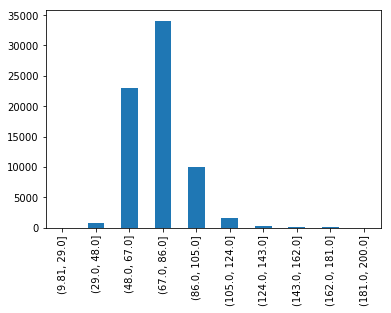

In [62]:
# Create 10 bins of equal width, and print column chart 
pd.cut(cardio.weight, 10).value_counts(sort = False).plot.bar()

In [63]:
# Mean weight in Kg
print("Mean weight in Kg:", cardio.weight.mean())

Mean weight in Kg: 74.20569


In [64]:
# Measures of central tendancy and distribution for weight in Kg
cardio.weight.describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

The mean weight in Kg is 74.2. This is greater than the median (72.0). Based on this, and the histogram above, there seems to be a right skew in the data. The lightest person is 10 Kg, and the heaviest is 200 Kg. This is a range of 190 Kg.

### Height

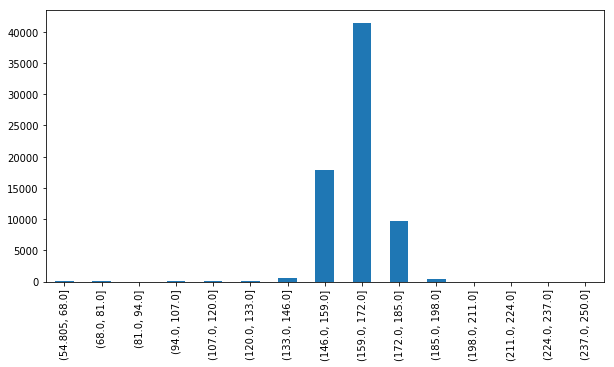

In [65]:
# Create 15 bins of eq`ual width, and print column chart 
pd.cut(cardio.height, 15).value_counts(sort = False).plot.bar(figsize = (10,5))

In [66]:
# Mean height in cm
print("Mean height in cm:", cardio.height.mean())

Mean height in cm: 164.35922857142856


In [67]:
# Measures of central tendancy and distribution for height in cm
cardio.height.describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

The mean height in cm is 164.4. This is less than the median (165.0). Based on this, and the histogram above, there seems to be a left skew in the data. The shortest person is 55 cm tall, and the tallest is 250 cm tall. This is a range of 195 cm.

### Gender

In [68]:
# Distribution of gender (women = 1 and men = 2)
cardio.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

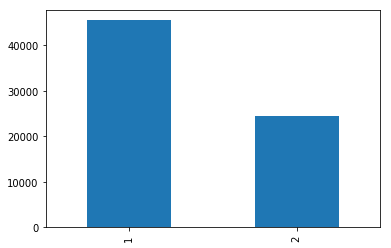

In [69]:
# Create column chart showing Women (1) and Men (2)
cardio.gender.value_counts(sort = False).plot.bar()

Out of the total 70,000 population, 45,530 (~65%) are women, and 24,470 (~35%) are men.

### Active

In [70]:
# Distribution of Active (0 = not active, 1 = active)
cardio.active.value_counts()

1    56261
0    13739
Name: active, dtype: int64

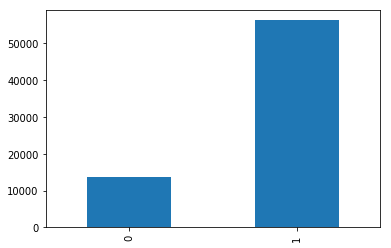

In [71]:
# Create column chart showing Active (0 = not active, 1 = active)
cardio.active.value_counts(sort = False).plot.bar()

Out of the total 70,000 population, 56,261 (~80%) are active, and 13,739 (~20%) are not.

### Cardio

In [72]:
# Distribution of cardio (no cardiac disease = 0 and cardiac disease = 1)
cardio.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

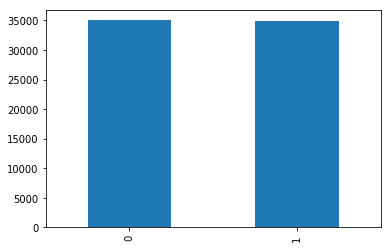

In [73]:
# Create column chart showing Active (0 = not active, 1 = active)
cardio.cardio.value_counts(sort = False).plot.bar()

Out of the total 70,000 population, 35,021 (~50%) are active, and 34,979 (~50%) are not.

# Data Visualization

In [74]:
# measure correlation between variables (don't include ID because it is an arbitrary identifying key)
corr = cardio[['age', 'gender', 'height', 'weight', 'active', 'cardio']].corr()
corr

,age,gender,height,weight,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,-0.016867,0.181660
active,-0.009927,0.005866,-0.006570,-0.016867,1.000000,-0.035653
cardio,0.238159,0.008109,-0.010821,0.181660,-0.035653,1.000000


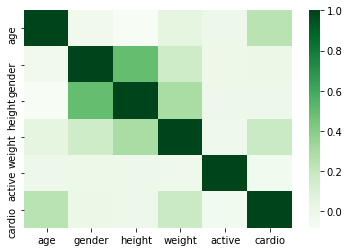

In [75]:
# Create heatmap correlating all values
heat_map = sns.heatmap(corr, cmap = "Greens")

Using my prior knowledge, I created a heatmap to view the correlations between variables. Upon inspection, I see a correlation between age and cardio, as well as weight and cardio (I am only interested in correlating variables with cardio).

My next step will be to explore how age and weight relate to the presence of cardiac disease.

In [76]:
# Create a chart of average age in years with and without cardiac disease
cardio['ageyears'] = round(cardio.age/365,2)
cardio[['cardio', 'ageyears']].groupby(['cardio'], as_index=False).mean().sort_values(by='cardio', ascending=False)

,cardio,ageyears
1,1,54.950158
0,0,51.730471


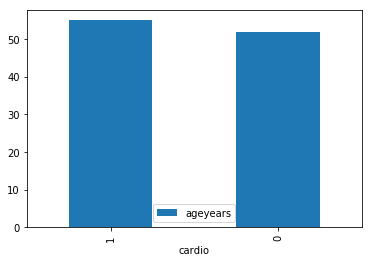

In [77]:
# Create a chart of average age in years with and without cardiac disease
cardio['ageyears'] = round(cardio.age/365,2)
cardio[['cardio', 'ageyears']].groupby(['cardio']).mean().sort_values(by='cardio', ascending=False).plot.bar()

This graph shows the average age, in years, for patients with, and without cardiac disease. We can see that there actually is not much of a difference, so based off of this data, age may not be that much of a deciding factor in cardiac disease. 

In [78]:
# Create a chart of average weight in Kg with and without cardiac disease
cardio[['cardio', 'weight']].groupby(['cardio'], as_index=False).mean().sort_values(by='cardio', ascending=False)

,cardio,weight
1,1,76.822368
0,0,71.592150


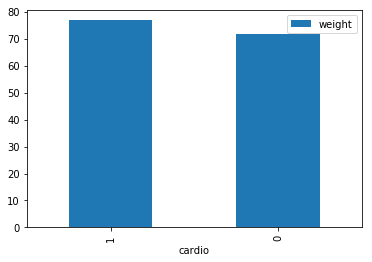

In [79]:
# Create a chart of average weight in Kg with and without cardiac disease
cardio[['cardio', 'weight']].groupby(['cardio']).mean().sort_values(by='cardio', ascending=False).plot.bar()

This graph shows the average weight, in Kg, of patients with, and without cardiac disease. As with the age chart, we can see that there is not much of a correlation, so, again, based on this data, weight may also not be much of a deciding factor in cardiac disease.

Overall, there did not seem to be much of a correlation between any of the variables and cardiac disease. This makes sense based off of my prior knowledge that multiple factors affect cardiac health. Future analysis could look deeper into how variables interact with each other to affect cardiac health. This project forced me to step out of my comfort zone, and play around with Python more. Future work could include all of the variables in this data set.